In [6]:
#Import necessary libraries

import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('customer_offers.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [7]:
#Train and test sets

from sklearn import model_selection
X_train, X_test = model_selection.train_test_split(df, random_state = 100)

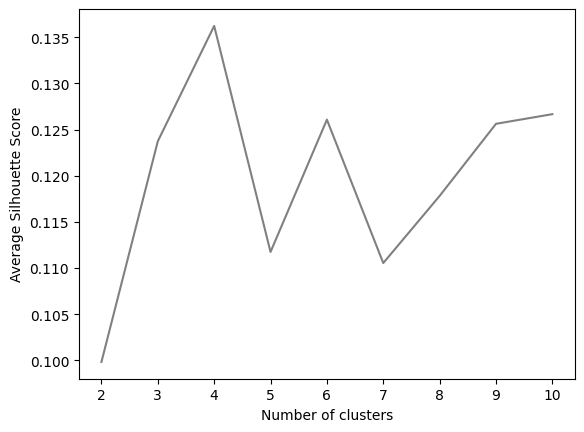

In [21]:
#Perform k-means on the data, identify the optimal number of clusters by 
#using the silhouette score approach on the train data

krange = list(range(2,11))

avg_silhouettes = []

for n in krange:

    model = cluster.KMeans(n_clusters=n, random_state=100)

    model.fit(X_train)

    cluster_assignments = model.predict(X_train)

    silhouette_avg = metrics.silhouette_score(X_train, \

                                              cluster_assignments)

    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='gray')

plt.xlabel("Number of clusters")

plt.ylabel("Average Silhouette Score")

plt.show()

In [22]:
#Perform K-Means clustering using k found and print the silhouette score

model = cluster.KMeans(n_clusters=3, random_state=100)
model.fit(X_train)
km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)
print('k-means silhouette score.' + str(km_silhouette))

k-means silhouette score.0.115298516478898


In [25]:
#Perform mean-shift clustering on the data, 
#using estimate_bandwidth method
#Print out the silhouette score 

bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1)
ms=cluster.MeanShift(bandwidth=bandwidth,\
                    bin_seeding=True)
ms.fit(X_train)
ms_labels=ms.predict(X_test)
ms_silhouette=metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score:' + str(ms_silhouette))



mean-shift silhouette score:0.07308587709358311


ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

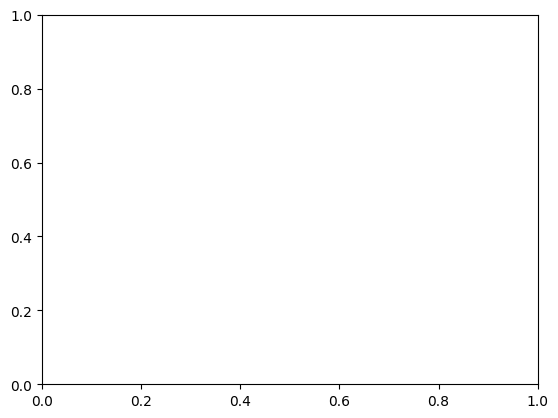

In [39]:
#Perform k-modes and identify the optimal number of clusters
#by using the silhouette score approach

from kmodes.kmodes import KModes

krange = list(range(3,11))

avg_silhouettes = []

for n in krange:
    km = KModes(n_clusters = n, random_state=100)
    
    km.fit(X_train)
    
    kmode_labels = km.predict(X_train)
    
    kmode_silhouette = metrics.silhouette_score(X_train, kmode_labels)
    
    avg_silhouettes.append(kmode_silhouette)
    
    plt.plot(krange, avg_silhouettes, color='gray')
    
    plt.xlabel("Number of clusters")
    
    plt.ylabel("Average Silhouette Score")
    